In [1]:
from logistic import *

In [2]:
np.random.seed(123)

In [3]:
rparam = np.arange(0.5, 1.5001, 0.05)
rlin = np.arange(0.5, 1.5001, 0.005)
tparam = np.arange(0.0, 30.0001, 1)
tlin = np.arange(0.0, 30.0001, 0.01)

In [4]:
class L(Logistic):
    _law = law2

In [5]:
model = r"\mathcal{N}(\mu=1, \sigma=0.15)"
#model = r"\mathrm{U}(0.5, 1.5)"

In [6]:
N = 300000

In [7]:
tlin1 = np.arange(0, 31, 1)
tlin2 = np.arange(0, 30.1, 0.2)

In [8]:
#tlin2[0] += 1e-4

In [9]:
df = L.sample(tlin1, size=N)

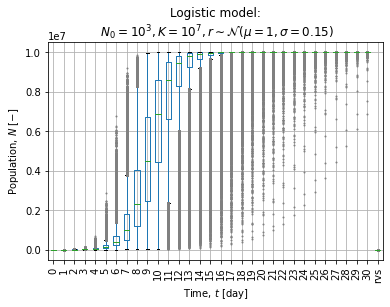

In [10]:
axe = df.boxplot(flierprops={"marker": ".", "markeredgecolor": "gray", "markersize": 2}, rot=90)
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
_ = axe.set_ylabel(r"Population, $N$ $[-]$")

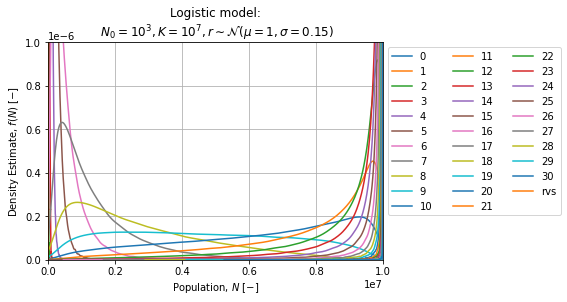

In [11]:
axe = df.iloc[:,::].plot(kind="kde")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Population, $N$ $[-]$")
axe.set_ylabel(r"Density Estimate, $f(N)$ $[-]$")
axe.set_xlim([0, 1e7])
axe.set_ylim([0, 1e-6])
axe.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=3)
axe.grid()

In [12]:
mu = L.mean(tlin2)

In [13]:
#mu

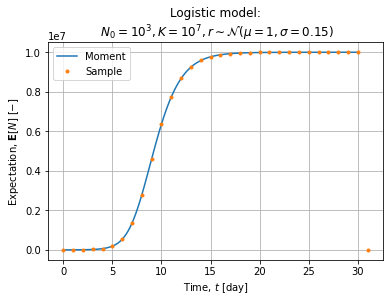

In [14]:
fig, axe = plt.subplots()
axe.plot(tlin2, mu[0], label="Moment")
df.mean().plot(marker='.', linestyle='none', ax=axe, label="Sample")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Expectation, $\mathbf{E}[N]$ $[-]$")
axe.legend()
axe.grid()

In [15]:
var = L.variance(tlin2)

In [16]:
#var

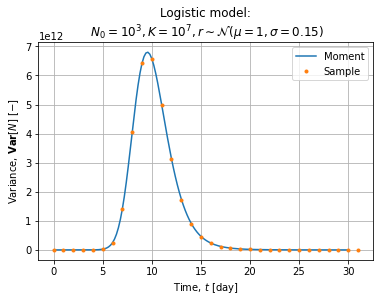

In [17]:
fig, axe = plt.subplots()
axe.plot(tlin2, var[0], label="Moment")
df.var().plot(marker='.', linestyle='none', ax=axe, label="Sample")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Variance, $\mathbf{Var}[N]$ $[-]$")
axe.legend()
axe.grid()

In [18]:
skew = L.skewness(tlin2)

In [19]:
skew[0][0] = np.nan

In [20]:
#skew

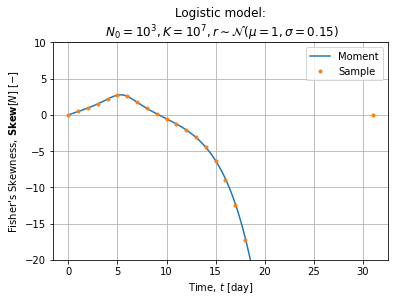

In [21]:
fig, axe = plt.subplots()
axe.plot(tlin2, skew[0], label="Moment")
df.skew().plot(marker='.', linestyle='none', ax=axe, label="Sample")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Fisher's Skewness, $\mathbf{Skew}[N]$ $[-]$")
axe.set_ylim([-20, 10])
axe.legend()
axe.grid()

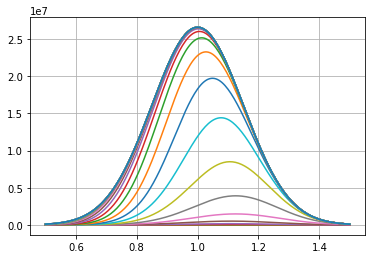

In [22]:
fig, axe = plt.subplots()
for t in tparam:
    axe.plot(rlin, L.moment_integrand(rlin, t, 1))
axe.grid()

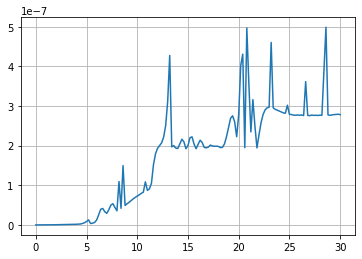

In [23]:
fig, axe = plt.subplots()
axe.plot(tlin2, mu[1])
axe.grid()

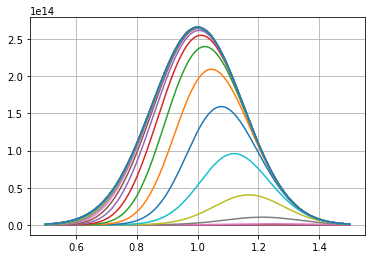

In [24]:
fig, axe = plt.subplots()
for t in tparam:
    axe.plot(rlin, L.moment_integrand(rlin, t, 2))
axe.grid()

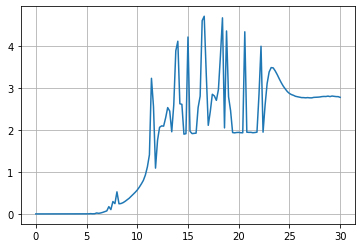

In [25]:
fig, axe = plt.subplots()
axe.plot(tlin2, var[1])
axe.grid()

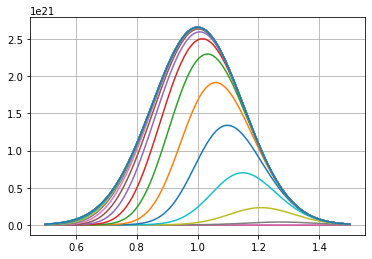

In [26]:
fig, axe = plt.subplots()
for t in tparam:
    axe.plot(rlin, L.moment_integrand(rlin, t, 3))
axe.grid()

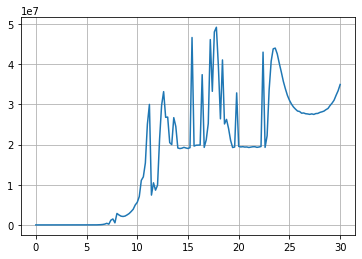

In [27]:
fig, axe = plt.subplots()
axe.plot(tlin2, skew[1])
axe.grid()

In [28]:
t = np.arange(0.1, 10.1, 0.1)
df = L.sample(t, size=1000)
rvs = df.pop("rvs")

In [29]:
stats.norm.fit(rvs)

(1.000852341534645, 0.1473268869862526)

In [30]:
stats.kstest(rvs.values, stats.norm(loc=1.0, scale=0.15).cdf)

KstestResult(statistic=0.011312990719823154, pvalue=0.9994117875617478)

<AxesSubplot:ylabel='Density'>

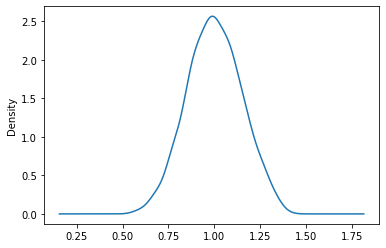

In [31]:
rvs.plot(kind="kde")

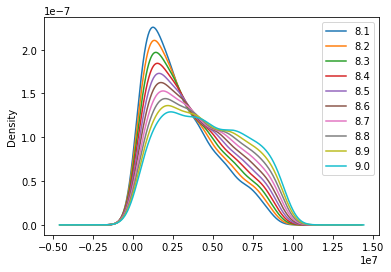

In [32]:
axe = df.iloc[:,80:90].plot(kind="kde")
#axe.set_ylim([0, 1e-4])
#axe.set_xlim([0, 1e7])
#axe.legend([])

In [33]:
def test(x):
    p = stats.lognorm.fit(x, 0.1, scale=1000, loc=100)
    t = stats.kstest(x, stats.lognorm(*p).cdf)
    return pd.Series({"params": p, "test": t, "pvalue": t.pvalue})

In [34]:
result = df.apply(test).T
result

,params,test,pvalue
0.1,"(0.011379383755260262, -325.5036317722372, 143...","(0.015671162820652396, 0.9634924927405284)",0.963492
0.2,"(0.026728267034724425, -124.876499542296, 1346...","(0.015605451383745028, 0.9648169202240271)",0.964817
0.3,"(0.04207122104725962, -67.99628002336473, 1418...","(0.015538761105869214, 0.9661292827845336)",0.966129
0.4,"(0.05740785299317201, -39.28873447865344, 1531...","(0.015471160554570873, 0.9674270345826198)",0.967427
0.5,"(0.07273804276624829, -20.650951368620483, 167...","(0.015402687464798503, 0.9687083426817692)",0.968708
...,...,...,...
9.6,"(0.014990075193862022, -166994661.78816825, 17...","(0.07876352977218182, 7.64666133920666e-06)",7.64666e-06
9.7,"(0.030647020019895665, -78803497.17534855, 846...","(0.08546650801892186, 8.369085409812725e-07)",8.36909e-07
9.8,"(0.013467295602080508, -186062104.22586954, 19...","(0.08647357973926495, 5.909077925542981e-07)",5.90908e-07
9.9,"(0.012541528805571075, -196624905.93473107, 20...","(0.09154446274500772, 9.623939319889624e-08)",9.62394e-08


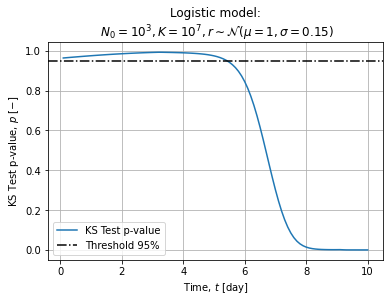

In [35]:
axe = result["pvalue"].plot(label="KS Test p-value")
#axe.set_yscale("log")
axe.axhline(0.95, linestyle="-.", color="k", label="Threshold 95%")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"KS Test p-value, $p$ $[-]$")
axe.legend()
axe.grid()

In [36]:
def test2(x):
    p = logitnorm.fit(x)
    t = stats.kstest(x, logitnorm(*p).cdf)
    return pd.Series({"params": p, "test": t, "pvalue": t.pvalue})

In [37]:
df2 = df/(1.0000001e7)

In [38]:
result = df2.iloc[:,:].apply(test2).T
result

,params,test,pvalue
0.1,"(-9.110155232833435, 0.0147326886984624)","(0.015297571238037933, 0.970610808616811)",0.970611
0.2,"(-9.010069998681137, 0.02946537739689044)","(0.015297571238004515, 0.9706108086174036)",0.970611
0.3,"(-8.909984764528966, 0.04419806609527857)","(0.01529757123798231, 0.9706108086177971)",0.970611
0.4,"(-8.809899530376937, 0.058930754793620393)","(0.015297571237943841, 0.9706108086184793)",0.970611
0.5,"(-8.709814296225062, 0.07366344349190863)","(0.015297571237910146, 0.9706108086190766)",0.970611
...,...,...,...
9.6,"(0.3979416300034587, 1.4143376357300474)","(0.015297562785289598, 0.9706109584759106)",0.970611
9.7,"(0.49802681606160043, 1.429070259685637)","(0.015297561957423267, 0.9706109731531577)",0.970611
9.8,"(0.5981119959884849, 1.4438028748806573)","(0.015297561054308462, 0.9706109891644799)",0.970611
9.9,"(0.698197168994105, 1.458535480126632)","(0.015297560069998772, 0.9706110066152996)",0.970611


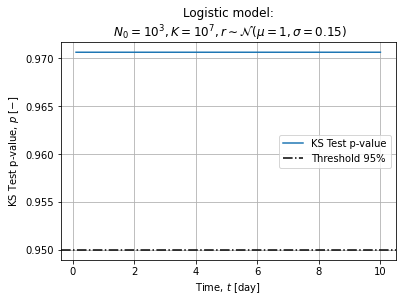

In [39]:
axe = result["pvalue"].plot(label="KS Test p-value")
#axe.set_yscale("log")
axe.axhline(0.95, linestyle="-.", color="k", label="Threshold 95%")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"KS Test p-value, $p$ $[-]$")
axe.legend()
axe.grid()